In [1]:
# 环境配置
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.model_selection import (
    GridSearchCV,
    StratifiedShuffleSplit,
    cross_val_score,
    train_test_split,
)


print("当前路径 -  %s" %os.getcwd())
# os.chdir("./") #改变路径

cvSFS= StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=100)
# 文件处理
CRCtrain=pd.read_excel("../data/IBD血液原始数据_副本.xlsx",sheet_name="train")#导入数据
CRCtrain['ill'].unique()
import matplotlib.pyplot as plt

# XGBoost 分类
import seaborn as sns

plt.rcParams['font.sans-serif']=['SimHei'] #显示中文
plt.rcParams['axes.unicode_minus'] = False
## 分类编码处理
#codes 方法返回每个分类的整数编码。
#这些编码是从 0 开始分配的，表示每个不同的分类。
#例如，如果 '对照' 列包含三个不同的分类：'A', 'B', 'C'，则 'A' 的编码为 0，'B' 的编码为 1，'C' 的编码为 2。

CRCtrain['ill'] = pd.Categorical(CRCtrain['ill']).codes 
#将 '对照' 列转换为整数编码，并将结果存储回 '对照' 列。CRC2['类别'] = pd.Categorical(IBD_2['类别']).codes
#提取特征列
CRCtrainX=CRCtrain.iloc[:,0:54] ##定义x
#提取标签列 
CRCtrainY=CRCtrain.iloc[:,54]##定义标签
# 测试集数据
CRCtest=pd.read_excel("../data/IBD血液原始数据_副本.xlsx",sheet_name="test")#导入数据
#codes 方法返回每个分类的整数编码。
#这些编码是从 0 开始分配的，表示每个不同的分类。
#例如，如果 '对照' 列包含三个不同的分类：'A', 'B', 'C'，则 'A' 的编码为 0，'B' 的编码为 1，'C' 的编码为 2。

CRCtest['ill'] = pd.Categorical(CRCtest['ill']).codes 
#将 '对照' 列转换为整数编码，并将结果存储回 '对照' 列。CRC2['类别'] = pd.Categorical(IBD_2['类别']).codes
#提取特征列
CRCtestX=CRCtest.iloc[:,0:54] ##定义x
#提取标签列
CRCtestY=CRCtest.iloc[:,54]##定义标签


当前路径 -  /Users/ruijie/Desktop/github/pytorch-prev/class7加载数据集


In [2]:


# pip install xgboost 
import xgboost as xgb

xgb.__version__
## XGBClassifier (未调参)
from xgboost import XGBClassifier

#模型训练
clfXGB=XGBClassifier(random_state=200)
#分训练集和测试集
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(CRCtrainX,CRCtrainY,test_size=0.2,random_state=100)
#在使用 ShuffleSplit 进行交叉验证时，通常需要指定 test_size 或 train_size，其中至少一个必须是非空的。

#例如，如果指定 test_size=0.3，则将数据集划分为 70% 的训练集和 30% 的测试集。

#每次迭代时，ShuffleSplit 都会重新随机重排数据集，并将其划分为训练集和测试集。

#最后，可以通过计算多个迭代的平均性能，来评估模型的泛化能力和稳定性。

# StratifiedShuffleSplit 是一种交叉验证策略，用于将数据集划分为训练集和测试集。与 ShuffleSplit 类似，StratifiedShuffleSplit 也是通过对数据集进行随机重排，然后将数据集划分为多个训练集和测试集，以测试模型在不同的训练集和测试集上的性能。不同之处在于 StratifiedShuffleSplit 会保证每个划分中，训练集和测试集中的类别分布是一致的，从而避免了因类别分布不均衡而导致的模型偏差或方差问题。

# sklearn.metrics.SCORERS.keys()返回一个包含所有可用的scoring函数名称的列表。这些名称可以作为scoring参数传递给cross_val_score()和GridSearchCV()等函数
# from sklearn.metrics import SCORERS

# print(SCORERS.keys())

# 'accuracy'：准确率；
# 
# 'balanced_accuracy'：平衡准确率；
# 
# 'top_k_accuracy'：top_k准确率，k可以通过参数进行设置；
# 
# 'average_precision'：平均准确率；
# 
# 'neg_brier_score'：负Brier分数；
# 
# 'f1'：F1分数，综合考虑了精确率和召回率；
# 
# 'f1_micro'：微平均F1分数；
# 
# 'f1_macro'：宏平均F1分数；
# 
# 'f1_weighted'：加权平均F1分数，按照样本数量加权；
# 
# 'f1_samples'：样本平均F1分数，针对多标签分类；
# 
# 'neg_log_loss'：负对数似然损失，适用于概率模型；
# 
# 'precision'：精确率；
# 
# 'recall'：召回率；
# 
# 'roc_auc'：ROC曲线下的面积；
# 
# 'roc_auc_ovo'：多类别ROC曲线下的面积（一对多）；
# 
# 'roc_auc_ovr'：多类别ROC曲线下的面积（一对剩余）；
# 
# 'balanced_accuracy'：平衡准确率。
# 
# 需要注意的是，有些指标是多类别分类特有的，例如roc_auc_ovo和roc_auc_ovr，可以处理多类别分类的问题。

clfXGB.fit(CRCtrainX,CRCtrainY)
# 预测概率
CRCtrainY_prob = clfXGB.predict_proba(CRCtrainX)[:, 1]

#正确预测个数的计数：准确率

print('准确率={}'.format(cross_val_score(clfXGB,CRCtrainX,CRCtrainY,scoring='accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
#正确预测个数的计数：准确率

print('recall={}'.format(cross_val_score(clfXGB,CRCtrainX,CRCtrainY,scoring='recall',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
#balanced accuracy
print('准确率={}'.format(cross_val_score(clfXGB,CRCtrainX,CRCtrainY,scoring='balanced_accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
print('roc_auc={}'.format(cross_val_score(clfXGB,CRCtrainX,CRCtrainY,scoring='roc_auc',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
print('precision{}'.format(cross_val_score(clfXGB,CRCtrainX,CRCtrainY,scoring='precision',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

print('F1值率{}'.format(cross_val_score(clfXGB,CRCtrainX,CRCtrainY,scoring='f1_weighted',cv=cvSFS).mean()))


准确率=0.6083333333333333
recall=0.3555555555555555
准确率=0.5577777777777777
roc_auc=0.6325925925925926
precision0.45519480519480526
F1值率0.5881780719280719


In [3]:

## 调参
import hyperopt
from hyperopt import STATUS_OK, Trials, fmin, hp, partial, tpe
from hyperopt.early_stop import no_progress_loss
from hyperopt.pyll.base import scope


def hyperopt_objective(params):
    clf=XGBClassifier(n_estimators= int(params['n_estimators']),#以字典的结构传入，int：参数取值为整数
                      learning_rate=int(params['learning_rate']),
                      max_depth=int(params['max_depth']),                   
                      random_state=100)#不需要调的就直接输入固定值  
     
    cv=StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=100)#定义交叉验证
    
    res = cross_val_score(clf,                                        
                          CRCtrainX,CRCtrainY, #输入交叉验证训练样本 
                          scoring='roc_auc',
                          cv=cv,
                          #error_score="raise",
                          ).mean() #如果交叉验证中算法执行报错，告诉错误理由
    

    return res 
 
spaces = {"n_estimators": hp.quniform("n_estimators",25,500,25),#均匀分布的浮点数
          "max_depth": hp.quniform("max_depth", 1, 10,2),
          "learning_rate": hp.quniform("learning_rate",0.1,1,0.1)}
         
                                        

#保存送代过程
trials=Trials()

#设置提前停止
early_stop_fn=no_progress_loss(100)  #连续100次损失函数没有下降，就停止模型

#定义代理模型
params_best2=fmin(hyperopt_objective,
                    space=spaces,
                    algo=tpe.suggest,
                    max_evals=100,
                    verbose=True,
                    trials=trials,
                    early_stop_fn=early_stop_fn,
                    rstate=np.random.default_rng(100)#稳定优化参数结果
                )     
#报错代码段：rstate=RandomState(seed),解决方案：rstate=np.random.default_rng(seed),问题根源：版本问题

params_best2

clfXGB=XGBClassifier(learning_rate=0.6, max_depth=4, n_estimators=450, random_state=200)
clfXGB
print('准确率={}'.format(cross_val_score(clfXGB,CRCtrainX,CRCtrainY,scoring='accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

print('roc_auc={}'.format(cross_val_score(clfXGB,CRCtrainX,CRCtrainY,scoring='roc_auc',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器



100%|██████████| 100/100 [01:51<00:00,  1.12s/trial, best loss: 0.5]
准确率=0.6166666666666666
roc_auc=0.6355555555555555


/Users/ruijie/.virtualenvs/pytorch-prev-qP6jJXPo/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AttributeError: 'int' object has no attribute 'split'

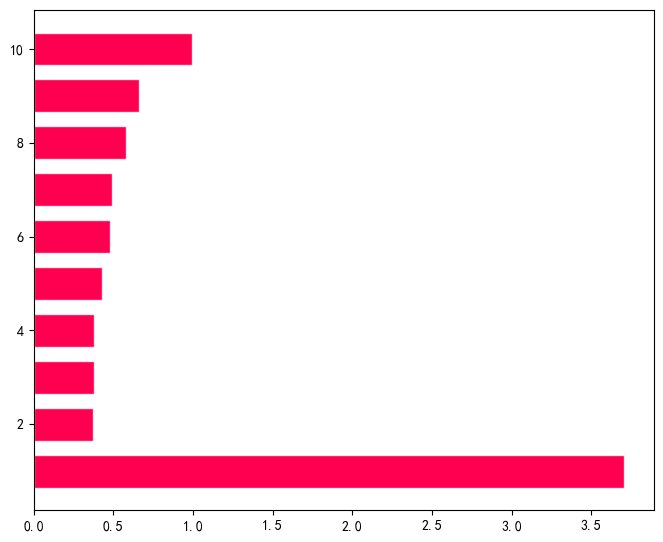

In [4]:

## shap
import shap

Y = CRCtrain['ill']
Y
#训练模型
XGBmodel=clfXGB
XGBmodel.fit(CRCtrainX,CRCtrainY)
explainer = shap.Explainer(XGBmodel)
shap_values = explainer(CRCtrainX)

shap.plots.bar(shap_values, max_display=10)
shap.plots.bar(shap_values.cohorts(2).abs.mean(0))

shap.plots.heatmap(shap_values[1:100])
shap.plots.waterfall(shap_values[11]) # For the first observation

shap.summary_plot(shap_values, CRCtrainX)
# SVM
from sklearn import svm

# 创建SVM分类器对象
svmclf = svm.SVC()
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit

cvSFS= StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=100)
print('roc_auc={}'.format(cross_val_score(svmclf,CRCtrainX,CRCtrainY,scoring='roc_auc',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
#正确预测个数的计数：准确率

print('准确率={}'.format(cross_val_score(svmclf,CRCtrainX,CRCtrainY,scoring='accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
#正确预测个数的计数：准确率

print('recall={}'.format(cross_val_score(svmclf,CRCtrainX,CRCtrainY,scoring='recall',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
print('precision{}'.format(cross_val_score(svmclf,CRCtrainX,CRCtrainY,scoring='precision',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# 使用训练集进行模型训练
svmclf.fit(CRCtrainX, CRCtrainY)

# 使用模型进行测试集预测
y_pred = svmclf.predict(CRCtestX)

# 计算评价指标
accuracy = accuracy_score(CRCtestY, y_pred)
recall = recall_score(CRCtestY, y_pred)
precision = precision_score(CRCtestY, y_pred)

auc = roc_auc_score(CRCtestY, y_pred)

print(f"AUC: {auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

# 设置bootstrap的迭代次数
n_iterations = 1000

# 存储每次迭代的AUC值
auc_scores = []

# 循环进行bootstrap迭代
for _ in range(n_iterations):
    # 通过有放回抽样创建新的测试集
    CRCtestX_bootstrap, CRCtestY_bootstrap = resample(CRCtestX, CRCtestY, random_state=np.random.randint(100))

    # 使用模型进行bootstrap样本的预测
    y_pred_bootstrap = svmclf.predict(CRCtestX_bootstrap)

    # 计算AUC并将其存储
    auc_bootstrap = roc_auc_score(CRCtestY_bootstrap, y_pred_bootstrap)
    auc_scores.append(auc_bootstrap)

# 计算95%置信区间
confidence_interval = np.percentile(auc_scores, [2.5, 97.5])

print(f"95% Confidence Interval for AUC: {confidence_interval}")

import matplotlib.pyplot as plt

# 设置字体为Arial
plt.rcParams["font.family"] = "Arial"
plt.figure(figsize=(6, 8), dpi=300)  # 这里的参数表示宽度和高度都为6英寸，输出分辨率为300 DPI


In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import StratifiedShuffleSplit

# 创建 StratifiedShuffleSplit 对象
cvSFS = StratifiedShuffleSplit(n_splits=5, test_size=0.35, random_state=100)

# 初始化空列表，用于存储每个折叠的ROC曲线数据
roc_data = []

# 设置图像大小
plt.figure(figsize=(6, 6))  # 设置宽度为8英寸，高度为6英寸

# 循环遍历每个折叠
for train_index, test_index in cvSFS.split(CRCtrainX, CRCtrainY):
    X_train, X_test = CRCtrainX.iloc[train_index], CRCtrainX.iloc[test_index]
    y_train, y_test = CRCtrainY.iloc[train_index], CRCtrainY.iloc[test_index]

    # 训练SVM模型
    svmclf.fit(X_train, y_train)

    # 获取决策函数值
    decision_values = svmclf.decision_function(X_test)

    # 计算 ROC 曲线的各个点
    fpr, tpr, thresholds = roc_curve(y_test, decision_values)
    roc_auc = auc(fpr, tpr)

    # 将ROC曲线数据添加到列表中
    roc_data.append((fpr, tpr, roc_auc))

# 创建一个颜色列表，可以根据需要添加更多颜色
colors = ['#008891', '#c06c84', '#222831', '#c61951', '#e43a19']

# 绘制每个折叠的ROC曲线
for i, (fpr, tpr, roc_auc) in enumerate(roc_data):
    color = colors[i % len(colors)]  # 通过取余来循环使用颜色列表
    plt.plot(fpr, tpr, lw=1, linestyle='--', color=color, label='ROC curve (Fold %d) (area = %0.2f)' % (i + 1, roc_auc))

# 绘制平均ROC曲线
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.mean([np.interp(mean_fpr, fpr, tpr) for fpr, tpr, _ in roc_data], axis=0)
mean_auc = auc(mean_fpr, mean_tpr)

# 添加阴影
plt.fill_between(mean_fpr, 0, mean_tpr, alpha=0.2, color='#dcdddd')

# 绘制平均ROC曲线
plt.plot(mean_fpr, mean_tpr, color='#c53d43', lw=2, linestyle='-', label='Mean ROC (area = %0.2f)' % mean_auc)

plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], color='#294a66', lw=2, linestyle='--')
# 设置轴线宽度
ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
# 设置轴线刻度线的宽度和长度
ax.tick_params(axis='x', which='both', width=2, length=6)
ax.tick_params(axis='y', which='both', width=2, length=6)

# 设置轴线标签和标题的字体和粗细
plt.ylabel('Sensitivity', fontsize=20, fontweight='bold')
plt.xlabel('1-Specificity', fontsize=20, fontweight='bold')
plt.xticks(fontsize=17, fontweight='bold')
plt.yticks(fontsize=17, fontweight='bold')
plt.title('ROC curve of training cohort - Cross Validation', fontsize=21, fontweight='bold')

from matplotlib.font_manager import FontProperties

# 创建 FontProperties 对象并设置字体为加粗
font = FontProperties()
font.set_weight('bold')
font.set_size(14.5)  # 设置字体大小
# 设置图例并传递 FontProperties 对象
plt.legend(prop=font, loc="lower right")


# 保存图像并设置输出分辨率
plt.savefig("SVM.png", dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()


from sklearn.metrics import auc, roc_curve

fpr, tpr, thresholds = roc_curve(CRCtestY, y_pred)
auc_value = auc(fpr, tpr)
print("AUC:", auc_value)

from sklearn.metrics import auc, roc_curve

# 获取模型在测试集上的预测概率
y_pred_prob = svmclf.decision_function(CRCtestX)  # 使用decision_function获取概率

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(CRCtestY, y_pred_prob)

# 计算AUC
roc_auc = auc(fpr, tpr)
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# 使用模型进行测试集预测
y_pred = svmclf.predict(CRCtestX)

# 计算AUC
y_pred_prob = svmclf.decision_function(CRCtestX)
roc_auc = roc_auc_score(CRCtestY, y_pred_prob)

# 计算准确性
accuracy = accuracy_score(CRCtestY, y_pred)

# 计算混淆矩阵
confusion = confusion_matrix(CRCtestY, y_pred)
# 计算特异性
specificity = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])

# 计算敏感性
sensitivity = confusion[1, 1] / (confusion[1, 0] + confusion[1, 1])

print(f"AUC: {roc_auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")

import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

# 设置bootstrap的迭代次数
n_iterations = 1000

# 存储每次迭代的AUC值
auc_scores = []

# 循环进行bootstrap迭代
for _ in range(n_iterations):
    # 通过有放回抽样创建新的测试集
    CRCtestX_bootstrap, CRCtestY_bootstrap = resample(CRCtestX, CRCtestY, random_state=np.random.randint(100))

    # 使用模型进行bootstrap样本的预测
    y_pred_bootstrap = svmclf.predict(CRCtestX_bootstrap)

    # 计算AUC并将其存储
    auc_bootstrap = roc_auc_score(CRCtestY_bootstrap, y_pred_bootstrap)
    auc_scores.append(auc_bootstrap)

# 计算95%置信区间
confidence_interval = np.percentile(auc_scores, [2.5, 97.5])

print(f"95% Confidence Interval for AUC: {confidence_interval}")

y_pred_prob

roc_auc

from sklearn.metrics import auc, roc_curve

# 获取模型在测试集上的预测概率
y_pred_prob = svmclf.decision_function(CRCtestX)  # 使用decision_function获取概率

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(CRCtestY, y_pred_prob)

# 计算AUC
roc_auc = auc(fpr, tpr)

# 设置图像大小
plt.figure(figsize=(6, 6))
# 绘制ROC曲线
plt.plot(fpr, tpr, color='#415f9d', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#294a66', lw=2, linestyle='--')

# 添加阴影
plt.fill_between(fpr, tpr, 0, alpha=0.2, color='#dcdddd')  # 添加阴影
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])

ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
# 设置轴线刻度线的宽度和长度
ax.tick_params(axis='x', which='both', width=2, length=6)
ax.tick_params(axis='y', which='both', width=2, length=6)


plt.title('ROC curve for validation cohort', fontsize=21, fontweight='bold')
# 设置轴线标签和标题的字体和粗细从
plt.ylabel('Sensitivity ', fontsize=20, fontweight='bold')
plt.xlabel('1-Specificity ', fontsize=20, fontweight='bold')
plt.xticks(fontsize=17, fontweight='bold')
plt.yticks(fontsize=17, fontweight='bold')

from matplotlib.font_manager import FontProperties

# 创建 FontProperties 对象并设置字体大小
font = FontProperties()
font.set_weight('bold')
font.set_size(17)  # 设置字体大小

# 设置图例并传递 FontProperties 对象
plt.legend(prop=font, loc="lower right")

accuracy_text = f'Accuracy  : 0.78'
sensitivity_text = f'Sensitivity: 0.80'
specificity_text = f'Specificity: 0.77'

# 添加文本标签到图例位置
plt.text(0.45, 0.35, accuracy_text, fontsize=18, fontweight='bold')
plt.text(0.45, 0.27, sensitivity_text, fontsize=18, fontweight='bold')
plt.text(0.45, 0.19, specificity_text, fontsize=18, fontweight='bold')


# 保存图像并设置输出分辨率
# 保存图像并设置输出分辨率
plt.savefig("SVM_ROC-voc.png", dpi=300, bbox_inches='tight', pad_inches=0.1)


plt.show()


from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# 获取模型在测试集上的预测标签
y_pred = svmclf.predict(CRCtestX)

# 计算AUC
y_pred_prob = svmclf.predict(CRCtestX)  # 获取决策函数值作为预测概率
roc_auc = roc_auc_score(CRCtestY, y_pred_prob)

# 计算Accuracy
accuracy = accuracy_score(CRCtestY, y_pred)

# 计算Confusion Matrix（混淆矩阵）
conf_matrix = confusion_matrix(CRCtestY, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# 计算Specificity和Sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# 打印结果
print("AUC:", roc_auc)
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)



explainer = shap.KernelExplainer(svmclf.predict,CRCtrainX)
shap_values = explainer(CRCtrainX)
shap.summary_plot(shap_values, CRCtrainX)



In [ ]:

#  GaussianNB
from sklearn.naive_bayes import GaussianNB

# 创建朴素贝叶斯分类器对象
NBclf = GaussianNB(var_smoothing=1e-9)
print('roc_auc={}'.format(cross_val_score(NBclf,CRCtrainX,CRCtrainY,scoring='roc_auc',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
#正确预测个数的计数：准确率

print('准确率={}'.format(cross_val_score(NBclf,CRCtrainX,CRCtrainY,scoring='accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
print('precision{}'.format(cross_val_score(NBclf,CRCtrainX,CRCtrainY,scoring='precision',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
#正确预测个数的计数：准确率

print('recall={}'.format(cross_val_score(NBclf,CRCtrainX,CRCtrainY,scoring='recall',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# 使用训练集进行模型训练
NBclf.fit(CRCtrainX, CRCtrainY)

# 使用模型进行测试集预测
y_pred = NBclf.predict(CRCtestX)

# 计算评价指标
accuracy = accuracy_score(CRCtestY, y_pred)
recall = recall_score(CRCtestY, y_pred)
precision = precision_score(CRCtestY, y_pred)

auc = roc_auc_score(CRCtestY, y_pred)

print(f"AUC: {auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

NBclf.fit(CRCtrainX, CRCtrainY)
# 获取模型在测试集上的预测概率
y_pred_prob = NBclf.predict_proba(CRCtestX)[:, 1]  # 使用predict_proba获取概率

# 计算AUC
roc_auc = roc_auc_score(CRCtestY, y_pred_prob)

# 获取模型在测试集上的预测标签
y_pred = NBclf.predict(CRCtestX)

# 计算Accuracy
accuracy = accuracy_score(CRCtestY, y_pred)

# 计算Confusion Matrix（混淆矩阵）
conf_matrix = confusion_matrix(CRCtestY, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# 计算Specificity和Sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# 打印结果
print("AUC:", roc_auc)
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

# 设置bootstrap的迭代次数
n_iterations = 1000

# 存储每次迭代的AUC值
auc_scores = []

# 循环进行bootstrap迭代
for _ in range(n_iterations):
    # 通过有放回抽样创建新的测试集
    CRCtestX_bootstrap, CRCtestY_bootstrap = resample(CRCtestX, CRCtestY, random_state=np.random.randint(100))

    # 使用模型进行bootstrap样本的预测
    y_pred_bootstrap = NBclf.predict(CRCtestX_bootstrap)

    # 计算AUC并将其存储
    auc_bootstrap = roc_auc_score(CRCtestY_bootstrap, y_pred_bootstrap)
    auc_scores.append(auc_bootstrap)

# 计算95%置信区间
confidence_interval = np.percentile(auc_scores, [2.5, 97.5])

print(f"95% Confidence Interval for AUC: {confidence_interval}")


explainer = shap.KernelExplainer(NBclf.predict,CRCtrainX)
shap_values = explainer(CRCtrainX)
shap.summary_plot(shap_values, CRCtrainX)



In [ ]:

# KNN
from sklearn.neighbors import KNeighborsClassifier

#创建KNN分类器对象
KNNclf = KNeighborsClassifier(n_neighbors=5)
print('roc_auc={}'.format(cross_val_score(KNNclf,CRCtrainX,CRCtrainY,scoring='roc_auc',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
#正确预测个数的计数：准确率

print('准确率={}'.format(cross_val_score(KNNclf,CRCtrainX,CRCtrainY,scoring='accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
print('precision{}'.format(cross_val_score(KNNclf,CRCtrainX,CRCtrainY,scoring='precision',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
#正确预测个数的计数：准确率

print('recall={}'.format(cross_val_score(KNNclf,CRCtrainX,CRCtrainY,scoring='recall',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
# 使用训练集进行模型训练
KNNclf.fit(CRCtrainX, CRCtrainY)

# 使用模型进行测试集预测
y_pred = KNNclf.predict(CRCtestX)

# 计算评价指标
accuracy = accuracy_score(CRCtestY, y_pred)
recall = recall_score(CRCtestY, y_pred)
precision = precision_score(CRCtestY, y_pred)

auc = roc_auc_score(CRCtestY, y_pred)

print(f"AUC: {auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# 获取模型在测试集上的预测概率
y_pred_prob = KNNclf.predict_proba(CRCtestX)[:, 1]  # 使用predict_proba获取概率

# 计算AUC
roc_auc = roc_auc_score(CRCtestY, y_pred_prob)

# 获取模型在测试集上的预测标签
y_pred = KNNclf.predict(CRCtestX)

# 计算Accuracy
accuracy = accuracy_score(CRCtestY, y_pred)

# 计算Confusion Matrix（混淆矩阵）
conf_matrix = confusion_matrix(CRCtestY, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# 计算Specificity和Sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# 打印结果
print("AUC:", roc_auc)
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

NBclf.fit(CRCtrainX, CRCtrainY)
# 获取模型在测试集上的预测概率
y_pred_prob = KNNclf.predict_proba(CRCtestX)[:, 1]  # 使用predict_proba获取概率

# 计算AUC
roc_auc = roc_auc_score(CRCtestY, y_pred_prob)

# 获取模型在测试集上的预测标签
y_pred = KNNclf.predict(CRCtestX)

# 计算Accuracy
accuracy = accuracy_score(CRCtestY, y_pred)

# 计算Confusion Matrix（混淆矩阵）
conf_matrix = confusion_matrix(CRCtestY, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# 计算Specificity和Sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# 打印结果
print("AUC:", roc_auc)
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

# 设置bootstrap的迭代次数
n_iterations = 1000

# 存储每次迭代的AUC值
auc_scores = []

# 循环进行bootstrap迭代
for _ in range(n_iterations):
    # 通过有放回抽样创建新的测试集
    CRCtestX_bootstrap, CRCtestY_bootstrap = resample(CRCtestX, CRCtestY, random_state=np.random.randint(100))

    # 使用模型进行bootstrap样本的预测
    y_pred_bootstrap = KNNclf.predict(CRCtestX_bootstrap)

    # 计算AUC并将其存储
    auc_bootstrap = roc_auc_score(CRCtestY_bootstrap, y_pred_bootstrap)
    auc_scores.append(auc_bootstrap)

# 计算95%置信区间
confidence_interval = np.percentile(auc_scores, [2.5, 97.5])

print(f"95% Confidence Interval for AUC: {confidence_interval}")


explainer = shap.KernelExplainer(KNNclf.predict,CRCtrainX)
shap_values = explainer(CRCtrainX)
shap.summary_plot(shap_values, CRCtrainX)
# LGB
from lightgbm import LGBMClassifier

# 重要参数：
lgb_model = LGBMClassifier()

print('roc_auc={}'.format(cross_val_score(lgb_model,CRCtrainX,CRCtrainY,scoring='roc_auc',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
#正确预测个数的计数：准确率

print('准确率={}'.format(cross_val_score(lgb_model,CRCtrainX,CRCtrainY,scoring='accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
print('precision{}'.format(cross_val_score(lgb_model,CRCtrainX,CRCtrainY,scoring='precision',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# 使用训练集进行模型训练
lgb_model.fit(CRCtrainX, CRCtrainY)

# 使用模型进行测试集预测
y_pred = lgb_model.predict(CRCtestX)

# 计算评价指标
accuracy = accuracy_score(CRCtestY, y_pred)
recall = recall_score(CRCtestY, y_pred)
precision = precision_score(CRCtestY, y_pred)

auc = roc_auc_score(CRCtestY, y_pred)

print(f"AUC: {auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
explainer = shap.Explainer(lgb_model)
shap_values = explainer(CRCtrainX)

from sklearn.datasets import load_iris

# adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Adaclf = AdaBoostClassifier(n_estimators=450, random_state=100)

print('roc_auc={}'.format(cross_val_score(Adaclf,CRCtrainX,CRCtrainY,scoring='roc_auc',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
#正确预测个数的计数：准确率

print('准确率={}'.format(cross_val_score(Adaclf,CRCtrainX,CRCtrainY,scoring='accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
print('precision{}'.format(cross_val_score(Adaclf,CRCtrainX,CRCtrainY,scoring='precision',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
#正确预测个数的计数：准确率

print('recall={}'.format(cross_val_score(Adaclf,CRCtrainX,CRCtrainY,scoring='recall',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# 使用训练集进行模型训练
Adaclf.fit(CRCtrainX, CRCtrainY)

# 使用模型进行测试集预测
y_pred = Adaclf.predict(CRCtestX)

# 计算评价指标
accuracy = accuracy_score(CRCtestY, y_pred)
recall = recall_score(CRCtestY, y_pred)
precision = precision_score(CRCtestY, y_pred)

auc = roc_auc_score(CRCtestY, y_pred)

print(f"AUC: {auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

Adaclf.fit(CRCtrainX, CRCtrainY)

# 使用模型对测试集进行预测
predictions = Adaclf.predict(CRCtestX)

# 计算AUC
auc = roc_auc_score(CRCtestY, predictions)

# 计算准确率
accuracy = accuracy_score(CRCtestY, predictions)

# 计算混淆矩阵，以便计算特异性和敏感性
conf_matrix = confusion_matrix(CRCtestY, predictions)

# 计算特异性
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# 计算敏感性
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])

# 打印结果
print(f"AUC: {auc}")
print(f"Accuracy: {accuracy}")
print(f"Specificity: {specificity}")
print(f"Sensitivity: {sensitivity}")

import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

# 设置bootstrap的迭代次数
n_iterations = 1000

# 存储每次迭代的AUC值
auc_scores = []

# 循环进行bootstrap迭代
for _ in range(n_iterations):
    # 通过有放回抽样创建新的测试集
    CRCtestX_bootstrap, CRCtestY_bootstrap = resample(CRCtestX, CRCtestY, random_state=np.random.randint(100))

    # 使用模型进行bootstrap样本的预测
    y_pred_bootstrap = Adaclf.predict(CRCtestX_bootstrap)

    # 计算AUC并将其存储
    auc_bootstrap = roc_auc_score(CRCtestY_bootstrap, y_pred_bootstrap)
    auc_scores.append(auc_bootstrap)

# 计算95%置信区间
confidence_interval = np.percentile(auc_scores, [2.5, 97.5])

print(f"95% Confidence Interval for AUC: {confidence_interval}")

# CatBoost
# pip install catboost


In [ ]:

import catboost
from catboost import CatBoostClassifier, Pool

Catclf = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=5, verbose=100)


print('roc_auc={}'.format(cross_val_score(Catclf,CRCtrainX,CRCtrainY,scoring='roc_auc',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
#正确预测个数的计数：准确率

print('准确率={}'.format(cross_val_score(Catclf,CRCtrainX,CRCtrainY,scoring='accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
print('precision{}'.format(cross_val_score(Catclf,CRCtrainX,CRCtrainY,scoring='precision',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
#正确预测个数的计数：准确率

print('recall={}'.format(cross_val_score(Catclf,CRCtrainX,CRCtrainY,scoring='recall',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
# 使用训练集进行模型训练
Catclf.fit(CRCtrainX, CRCtrainY)

# 使用模型进行测试集预测
y_pred = Catclf.predict(CRCtestX)

# 计算评价指标
accuracy = accuracy_score(CRCtestY, y_pred)
recall = recall_score(CRCtestY, y_pred)
precision = precision_score(CRCtestY, y_pred)

auc = roc_auc_score(CRCtestY, y_pred)

print(f"AUC: {auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

# 设置bootstrap的迭代次数
n_iterations = 1000

# 存储每次迭代的AUC值
auc_scores = []

# 循环进行bootstrap迭代
for _ in range(n_iterations):
    # 通过有放回抽样创建新的测试集
    CRCtestX_bootstrap, CRCtestY_bootstrap = resample(CRCtestX, CRCtestY, random_state=np.random.randint(100))

    # 使用模型进行bootstrap样本的预测
    y_pred_bootstrap = Catclf.predict(CRCtestX_bootstrap)

    # 计算AUC并将其存储
    auc_bootstrap = roc_auc_score(CRCtestY_bootstrap, y_pred_bootstrap)
    auc_scores.append(auc_bootstrap)

# 计算95%置信区间
confidence_interval = np.percentile(auc_scores, [2.5, 97.5])

print(f"95% Confidence Interval for AUC: {confidence_interval}")




In [ ]:

CRCtest['ill'] = pd.Categorical(CRCtest['ill']).codes 
#将 '对照' 列转换为整数编码，并将结果存储回 '对照' 列。CRC2['类别'] = pd.Categorical(IBD_2['类别']).codes
#提取特征列
CRCtestX=CRCtest.iloc[:,0:54] ##定义x
#提取标签列
CRCtestY=CRCtest.iloc[:,54]##定义标签


# pip install xgboost 
import xgboost as xgb

xgb.__version__
## XGBClassifier (未调参)
from xgboost import XGBClassifier

#模型训练
clfXGB=XGBClassifier(random_state=200)
#分训练集和测试集
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(CRCtrainX,CRCtrainY,test_size=0.2,random_state=100)
#在使用 ShuffleSplit 进行交叉验证时，通常需要指定 test_size 或 train_size，其中至少一个必须是非空的。

#例如，如果指定 test_size=0.3，则将数据集划分为 70% 的训练集和 30% 的测试集。

#每次迭代时，ShuffleSplit 都会重新随机重排数据集，并将其划分为训练集和测试集。

#最后，可以通过计算多个迭代的平均性能，来评估模型的泛化能力和稳定性。

# StratifiedShuffleSplit 是一种交叉验证策略，用于将数据集划分为训练集和测试集。与 ShuffleSplit 类似，StratifiedShuffleSplit 也是通过对数据集进行随机重排，然后将数据集划分为多个训练集和测试集，以测试模型在不同的训练集和测试集上的性能。不同之处在于 StratifiedShuffleSplit 会保证每个划分中，训练集和测试集中的类别分布是一致的，从而避免了因类别分布不均衡而导致的模型偏差或方差问题。

# sklearn.metrics.SCORERS.keys()返回一个包含所有可用的scoring函数名称的列表。这些名称可以作为scoring参数传递给cross_val_score()和GridSearchCV()等函数
# from sklearn.metrics import SCORERS

# print(SCORERS.keys())

# 'accuracy'：准确率；
# 
# 'balanced_accuracy'：平衡准确率；
# 
# 'top_k_accuracy'：top_k准确率，k可以通过参数进行设置；
# 
# 'average_precision'：平均准确率；
# 
# 'neg_brier_score'：负Brier分数；
# 
# 'f1'：F1分数，综合考虑了精确率和召回率；
# 
# 'f1_micro'：微平均F1分数；
# 
# 'f1_macro'：宏平均F1分数；
# 
# 'f1_weighted'：加权平均F1分数，按照样本数量加权；
# 
# 'f1_samples'：样本平均F1分数，针对多标签分类；
# 
# 'neg_log_loss'：负对数似然损失，适用于概率模型；
# 
# 'precision'：精确率；
# 
# 'recall'：召回率；
# 
# 'roc_auc'：ROC曲线下的面积；
# 
# 'roc_auc_ovo'：多类别ROC曲线下的面积（一对多）；
# 
# 'roc_auc_ovr'：多类别ROC曲线下的面积（一对剩余）；
# 
# 'balanced_accuracy'：平衡准确率。
# 
# 需要注意的是，有些指标是多类别分类特有的，例如roc_auc_ovo和roc_auc_ovr，可以处理多类别分类的问题。

clfXGB.fit(CRCtrainX,CRCtrainY)
# 预测概率
CRCtrainY_prob = clfXGB.predict_proba(CRCtrainX)[:, 1]

#正确预测个数的计数：准确率

print('准确率={}'.format(cross_val_score(clfXGB,CRCtrainX,CRCtrainY,scoring='accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
#正确预测个数的计数：准确率

print('recall={}'.format(cross_val_score(clfXGB,CRCtrainX,CRCtrainY,scoring='recall',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
#balanced accuracy
print('准确率={}'.format(cross_val_score(clfXGB,CRCtrainX,CRCtrainY,scoring='balanced_accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
print('roc_auc={}'.format(cross_val_score(clfXGB,CRCtrainX,CRCtrainY,scoring='roc_auc',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
print('precision{}'.format(cross_val_score(clfXGB,CRCtrainX,CRCtrainY,scoring='precision',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

print('F1值率{}'.format(cross_val_score(clfXGB,CRCtrainX,CRCtrainY,scoring='f1_weighted',cv=cvSFS).mean()))

## 调参
import hyperopt
from hyperopt import STATUS_OK, Trials, fmin, hp, partial, tpe
from hyperopt.early_stop import no_progress_loss
from hyperopt.pyll.base import scope


def hyperopt_objective(params):
    clf=XGBClassifier(n_estimators= int(params['n_estimators']),#以字典的结构传入，int：参数取值为整数
                      learning_rate=int(params['learning_rate']),
                      max_depth=int(params['max_depth']),                   
                      random_state=100)#不需要调的就直接输入固定值  
     
    cv=StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=100)#定义交叉验证
    
    res = cross_val_score(clf,                                        
                          CRCtrainX,CRCtrainY, #输入交叉验证训练样本 
                          scoring='roc_auc',
                          cv=cv,
                          #error_score="raise",
                          ).mean() #如果交叉验证中算法执行报错，告诉错误理由
    

    return res 
 
spaces = {"n_estimators": hp.quniform("n_estimators",25,500,25),#均匀分布的浮点数
          "max_depth": hp.quniform("max_depth", 1, 10,2),
          "learning_rate": hp.quniform("learning_rate",0.1,1,0.1)}
         
                                        

#保存送代过程
trials=Trials()

#设置提前停止
early_stop_fn=no_progress_loss(100)  #连续100次损失函数没有下降，就停止模型

#定义代理模型
params_best2=fmin(hyperopt_objective,
                    space=spaces,
                    algo=tpe.suggest,
                    max_evals=100,
                    verbose=True,
                    trials=trials,
                    early_stop_fn=early_stop_fn,
                    rstate=np.random.default_rng(100)#稳定优化参数结果
                )     
#报错代码段：rstate=RandomState(seed),解决方案：rstate=np.random.default_rng(seed),问题根源：版本问题

params_best2

clfXGB=XGBClassifier(learning_rate=0.6, max_depth=4, n_estimators=450, random_state=200)
clfXGB
print('准确率={}'.format(cross_val_score(clfXGB,CRCtrainX,CRCtrainY,scoring='accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

print('roc_auc={}'.format(cross_val_score(clfXGB,CRCtrainX,CRCtrainY,scoring='roc_auc',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器


## shap
import shap

Y = CRCtrain['ill']
Y
#训练模型
XGBmodel=clfXGB
XGBmodel.fit(CRCtrainX,CRCtrainY)
explainer = shap.Explainer(XGBmodel)
shap_values = explainer(CRCtrainX)

shap.plots.bar(shap_values, max_display=10)
shap.plots.bar(shap_values.cohorts(2).abs.mean(0))

shap.plots.heatmap(shap_values[1:100])
shap.plots.waterfall(shap_values[11]) # For the first observation

shap.summary_plot(shap_values, CRCtrainX)
# SVM
from sklearn import svm

# 创建SVM分类器对象
svmclf = svm.SVC()


cvSFS= StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=100)
print('roc_auc={}'.format(cross_val_score(svmclf,CRCtrainX,CRCtrainY,scoring='roc_auc',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
#正确预测个数的计数：准确率

print('准确率={}'.format(cross_val_score(svmclf,CRCtrainX,CRCtrainY,scoring='accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
#正确预测个数的计数：准确率

print('recall={}'.format(cross_val_score(svmclf,CRCtrainX,CRCtrainY,scoring='recall',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
print('precision{}'.format(cross_val_score(svmclf,CRCtrainX,CRCtrainY,scoring='precision',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# 使用训练集进行模型训练
svmclf.fit(CRCtrainX, CRCtrainY)

# 使用模型进行测试集预测
y_pred = svmclf.predict(CRCtestX)

# 计算评价指标
accuracy = accuracy_score(CRCtestY, y_pred)
recall = recall_score(CRCtestY, y_pred)
precision = precision_score(CRCtestY, y_pred)

auc = roc_auc_score(CRCtestY, y_pred)

print(f"AUC: {auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

# 设置bootstrap的迭代次数
n_iterations = 1000

# 存储每次迭代的AUC值
auc_scores = []

# 循环进行bootstrap迭代
for _ in range(n_iterations):
    # 通过有放回抽样创建新的测试集
    CRCtestX_bootstrap, CRCtestY_bootstrap = resample(CRCtestX, CRCtestY, random_state=np.random.randint(100))

    # 使用模型进行bootstrap样本的预测
    y_pred_bootstrap = svmclf.predict(CRCtestX_bootstrap)

    # 计算AUC并将其存储
    auc_bootstrap = roc_auc_score(CRCtestY_bootstrap, y_pred_bootstrap)
    auc_scores.append(auc_bootstrap)

# 计算95%置信区间
confidence_interval = np.percentile(auc_scores, [2.5, 97.5])

print(f"95% Confidence Interval for AUC: {confidence_interval}")

import matplotlib.pyplot as plt

# 设置字体为Arial
plt.rcParams["font.family"] = "Arial"
plt.figure(figsize=(6, 8), dpi=300)  # 这里的参数表示宽度和高度都为6英寸，输出分辨率为300 DPI



In [ ]:


import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import StratifiedShuffleSplit

# 创建 StratifiedShuffleSplit 对象
cvSFS = StratifiedShuffleSplit(n_splits=5, test_size=0.35, random_state=100)

# 初始化空列表，用于存储每个折叠的ROC曲线数据
roc_data = []

# 设置图像大小
plt.figure(figsize=(6, 6))  # 设置宽度为8英寸，高度为6英寸

# 循环遍历每个折叠
for train_index, test_index in cvSFS.split(CRCtrainX, CRCtrainY):
    X_train, X_test = CRCtrainX.iloc[train_index], CRCtrainX.iloc[test_index]
    y_train, y_test = CRCtrainY.iloc[train_index], CRCtrainY.iloc[test_index]

    # 训练SVM模型
    svmclf.fit(X_train, y_train)

    # 获取决策函数值
    decision_values = svmclf.decision_function(X_test)

    # 计算 ROC 曲线的各个点
    fpr, tpr, thresholds = roc_curve(y_test, decision_values)
    roc_auc = auc(fpr, tpr)

    # 将ROC曲线数据添加到列表中
    roc_data.append((fpr, tpr, roc_auc))

# 创建一个颜色列表，可以根据需要添加更多颜色
colors = ['#008891', '#c06c84', '#222831', '#c61951', '#e43a19']

# 绘制每个折叠的ROC曲线
for i, (fpr, tpr, roc_auc) in enumerate(roc_data):
    color = colors[i % len(colors)]  # 通过取余来循环使用颜色列表
    plt.plot(fpr, tpr, lw=1, linestyle='--', color=color, label='ROC curve (Fold %d) (area = %0.2f)' % (i + 1, roc_auc))

# 绘制平均ROC曲线
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.mean([np.interp(mean_fpr, fpr, tpr) for fpr, tpr, _ in roc_data], axis=0)
mean_auc = auc(mean_fpr, mean_tpr)

# 添加阴影
plt.fill_between(mean_fpr, 0, mean_tpr, alpha=0.2, color='#dcdddd')

# 绘制平均ROC曲线
plt.plot(mean_fpr, mean_tpr, color='#c53d43', lw=2, linestyle='-', label='Mean ROC (area = %0.2f)' % mean_auc)

plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], color='#294a66', lw=2, linestyle='--')
# 设置轴线宽度
ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
# 设置轴线刻度线的宽度和长度
ax.tick_params(axis='x', which='both', width=2, length=6)
ax.tick_params(axis='y', which='both', width=2, length=6)

# 设置轴线标签和标题的字体和粗细
plt.ylabel('Sensitivity', fontsize=20, fontweight='bold')
plt.xlabel('1-Specificity', fontsize=20, fontweight='bold')
plt.xticks(fontsize=17, fontweight='bold')
plt.yticks(fontsize=17, fontweight='bold')
plt.title('ROC curve of training cohort - Cross Validation', fontsize=21, fontweight='bold')

from matplotlib.font_manager import FontProperties

# 创建 FontProperties 对象并设置字体为加粗
font = FontProperties()
font.set_weight('bold')
font.set_size(14.5)  # 设置字体大小
# 设置图例并传递 FontProperties 对象
plt.legend(prop=font, loc="lower right")


# 保存图像并设置输出分辨率
plt.savefig("SVM.png", dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()


from sklearn.metrics import auc, roc_curve

fpr, tpr, thresholds = roc_curve(CRCtestY, y_pred)
auc_value = auc(fpr, tpr)
print("AUC:", auc_value)

from sklearn.metrics import auc, roc_curve

# 获取模型在测试集上的预测概率
y_pred_prob = svmclf.decision_function(CRCtestX)  # 使用decision_function获取概率

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(CRCtestY, y_pred_prob)

# 计算AUC
roc_auc = auc(fpr, tpr)
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# 使用模型进行测试集预测
y_pred = svmclf.predict(CRCtestX)

# 计算AUC
y_pred_prob = svmclf.decision_function(CRCtestX)
roc_auc = roc_auc_score(CRCtestY, y_pred_prob)

# 计算准确性
accuracy = accuracy_score(CRCtestY, y_pred)

# 计算混淆矩阵
confusion = confusion_matrix(CRCtestY, y_pred)
# 计算特异性
specificity = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])

# 计算敏感性
sensitivity = confusion[1, 1] / (confusion[1, 0] + confusion[1, 1])

print(f"AUC: {roc_auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")

import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

# 设置bootstrap的迭代次数
n_iterations = 1000

# 存储每次迭代的AUC值
auc_scores = []

# 循环进行bootstrap迭代
for _ in range(n_iterations):
    # 通过有放回抽样创建新的测试集
    CRCtestX_bootstrap, CRCtestY_bootstrap = resample(CRCtestX, CRCtestY, random_state=np.random.randint(100))

    # 使用模型进行bootstrap样本的预测
    y_pred_bootstrap = svmclf.predict(CRCtestX_bootstrap)

    # 计算AUC并将其存储
    auc_bootstrap = roc_auc_score(CRCtestY_bootstrap, y_pred_bootstrap)
    auc_scores.append(auc_bootstrap)

# 计算95%置信区间
confidence_interval = np.percentile(auc_scores, [2.5, 97.5])

print(f"95% Confidence Interval for AUC: {confidence_interval}")

y_pred_prob

roc_auc

from sklearn.metrics import auc, roc_curve

# 获取模型在测试集上的预测概率
y_pred_prob = svmclf.decision_function(CRCtestX)  # 使用decision_function获取概率

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(CRCtestY, y_pred_prob)

# 计算AUC
roc_auc = auc(fpr, tpr)

# 设置图像大小
plt.figure(figsize=(6, 6))
# 绘制ROC曲线
plt.plot(fpr, tpr, color='#415f9d', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#294a66', lw=2, linestyle='--')

# 添加阴影
plt.fill_between(fpr, tpr, 0, alpha=0.2, color='#dcdddd')  # 添加阴影
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])

ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
# 设置轴线刻度线的宽度和长度
ax.tick_params(axis='x', which='both', width=2, length=6)
ax.tick_params(axis='y', which='both', width=2, length=6)


plt.title('ROC curve for validation cohort', fontsize=21, fontweight='bold')
# 设置轴线标签和标题的字体和粗细从
plt.ylabel('Sensitivity ', fontsize=20, fontweight='bold')
plt.xlabel('1-Specificity ', fontsize=20, fontweight='bold')
plt.xticks(fontsize=17, fontweight='bold')
plt.yticks(fontsize=17, fontweight='bold')

from matplotlib.font_manager import FontProperties

# 创建 FontProperties 对象并设置字体大小
font = FontProperties()
font.set_weight('bold')
font.set_size(17)  # 设置字体大小

# 设置图例并传递 FontProperties 对象
plt.legend(prop=font, loc="lower right")

accuracy_text = f'Accuracy  : 0.78'
sensitivity_text = f'Sensitivity: 0.80'
specificity_text = f'Specificity: 0.77'

# 添加文本标签到图例位置
plt.text(0.45, 0.35, accuracy_text, fontsize=18, fontweight='bold')
plt.text(0.45, 0.27, sensitivity_text, fontsize=18, fontweight='bold')
plt.text(0.45, 0.19, specificity_text, fontsize=18, fontweight='bold')


# 保存图像并设置输出分辨率
# 保存图像并设置输出分辨率
plt.savefig("SVM_ROC-voc.png", dpi=300, bbox_inches='tight', pad_inches=0.1)


plt.show()


In [ ]:


from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# 获取模型在测试集上的预测标签
y_pred = svmclf.predict(CRCtestX)

# 计算AUC
y_pred_prob = svmclf.predict(CRCtestX)  # 获取决策函数值作为预测概率
roc_auc = roc_auc_score(CRCtestY, y_pred_prob)

# 计算Accuracy
accuracy = accuracy_score(CRCtestY, y_pred)

# 计算Confusion Matrix（混淆矩阵）
conf_matrix = confusion_matrix(CRCtestY, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# 计算Specificity和Sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# 打印结果
print("AUC:", roc_auc)
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)



explainer = shap.KernelExplainer(svmclf.predict,CRCtrainX)
shap_values = explainer(CRCtrainX)
shap.summary_plot(shap_values, CRCtrainX)


#  GaussianNB
from sklearn.naive_bayes import GaussianNB

# 创建朴素贝叶斯分类器对象
NBclf = GaussianNB(var_smoothing=1e-9)
print('roc_auc={}'.format(cross_val_score(NBclf,CRCtrainX,CRCtrainY,scoring='roc_auc',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
#正确预测个数的计数：准确率

print('准确率={}'.format(cross_val_score(NBclf,CRCtrainX,CRCtrainY,scoring='accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
print('precision{}'.format(cross_val_score(NBclf,CRCtrainX,CRCtrainY,scoring='precision',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
#正确预测个数的计数：准确率

print('recall={}'.format(cross_val_score(NBclf,CRCtrainX,CRCtrainY,scoring='recall',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# 使用训练集进行模型训练
NBclf.fit(CRCtrainX, CRCtrainY)

# 使用模型进行测试集预测
y_pred = NBclf.predict(CRCtestX)

# 计算评价指标
accuracy = accuracy_score(CRCtestY, y_pred)
recall = recall_score(CRCtestY, y_pred)
precision = precision_score(CRCtestY, y_pred)

auc = roc_auc_score(CRCtestY, y_pred)

print(f"AUC: {auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

NBclf.fit(CRCtrainX, CRCtrainY)
# 获取模型在测试集上的预测概率
y_pred_prob = NBclf.predict_proba(CRCtestX)[:, 1]  # 使用predict_proba获取概率

# 计算AUC
roc_auc = roc_auc_score(CRCtestY, y_pred_prob)

# 获取模型在测试集上的预测标签
y_pred = NBclf.predict(CRCtestX)

# 计算Accuracy
accuracy = accuracy_score(CRCtestY, y_pred)

# 计算Confusion Matrix（混淆矩阵）
conf_matrix = confusion_matrix(CRCtestY, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# 计算Specificity和Sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# 打印结果
print("AUC:", roc_auc)
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

# 设置bootstrap的迭代次数
n_iterations = 1000

# 存储每次迭代的AUC值
auc_scores = []

# 循环进行bootstrap迭代
for _ in range(n_iterations):
    # 通过有放回抽样创建新的测试集
    CRCtestX_bootstrap, CRCtestY_bootstrap = resample(CRCtestX, CRCtestY, random_state=np.random.randint(100))

    # 使用模型进行bootstrap样本的预测
    y_pred_bootstrap = NBclf.predict(CRCtestX_bootstrap)

    # 计算AUC并将其存储
    auc_bootstrap = roc_auc_score(CRCtestY_bootstrap, y_pred_bootstrap)
    auc_scores.append(auc_bootstrap)

# 计算95%置信区间
confidence_interval = np.percentile(auc_scores, [2.5, 97.5])

print(f"95% Confidence Interval for AUC: {confidence_interval}")


explainer = shap.KernelExplainer(NBclf.predict,CRCtrainX)
shap_values = explainer(CRCtrainX)
shap.summary_plot(shap_values, CRCtrainX)


In [ ]:


# KNN
from sklearn.neighbors import KNeighborsClassifier

#创建KNN分类器对象
KNNclf = KNeighborsClassifier(n_neighbors=5)
print('roc_auc={}'.format(cross_val_score(KNNclf,CRCtrainX,CRCtrainY,scoring='roc_auc',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
#正确预测个数的计数：准确率

print('准确率={}'.format(cross_val_score(KNNclf,CRCtrainX,CRCtrainY,scoring='accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
print('precision{}'.format(cross_val_score(KNNclf,CRCtrainX,CRCtrainY,scoring='precision',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
#正确预测个数的计数：准确率

print('recall={}'.format(cross_val_score(KNNclf,CRCtrainX,CRCtrainY,scoring='recall',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
# 使用训练集进行模型训练
KNNclf.fit(CRCtrainX, CRCtrainY)

# 使用模型进行测试集预测
y_pred = KNNclf.predict(CRCtestX)

# 计算评价指标
accuracy = accuracy_score(CRCtestY, y_pred)
recall = recall_score(CRCtestY, y_pred)
precision = precision_score(CRCtestY, y_pred)

auc = roc_auc_score(CRCtestY, y_pred)

print(f"AUC: {auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# 获取模型在测试集上的预测概率
y_pred_prob = KNNclf.predict_proba(CRCtestX)[:, 1]  # 使用predict_proba获取概率

# 计算AUC
roc_auc = roc_auc_score(CRCtestY, y_pred_prob)

# 获取模型在测试集上的预测标签
y_pred = KNNclf.predict(CRCtestX)

# 计算Accuracy
accuracy = accuracy_score(CRCtestY, y_pred)

# 计算Confusion Matrix（混淆矩阵）
conf_matrix = confusion_matrix(CRCtestY, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# 计算Specificity和Sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# 打印结果
print("AUC:", roc_auc)
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

NBclf.fit(CRCtrainX, CRCtrainY)
# 获取模型在测试集上的预测概率
y_pred_prob = KNNclf.predict_proba(CRCtestX)[:, 1]  # 使用predict_proba获取概率

# 计算AUC
roc_auc = roc_auc_score(CRCtestY, y_pred_prob)

# 获取模型在测试集上的预测标签
y_pred = KNNclf.predict(CRCtestX)

# 计算Accuracy
accuracy = accuracy_score(CRCtestY, y_pred)

# 计算Confusion Matrix（混淆矩阵）
conf_matrix = confusion_matrix(CRCtestY, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# 计算Specificity和Sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# 打印结果
print("AUC:", roc_auc)
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

# 设置bootstrap的迭代次数
n_iterations = 1000

# 存储每次迭代的AUC值
auc_scores = []

# 循环进行bootstrap迭代
for _ in range(n_iterations):
    # 通过有放回抽样创建新的测试集
    CRCtestX_bootstrap, CRCtestY_bootstrap = resample(CRCtestX, CRCtestY, random_state=np.random.randint(100))

    # 使用模型进行bootstrap样本的预测
    y_pred_bootstrap = KNNclf.predict(CRCtestX_bootstrap)

    # 计算AUC并将其存储
    auc_bootstrap = roc_auc_score(CRCtestY_bootstrap, y_pred_bootstrap)
    auc_scores.append(auc_bootstrap)

# 计算95%置信区间
confidence_interval = np.percentile(auc_scores, [2.5, 97.5])

print(f"95% Confidence Interval for AUC: {confidence_interval}")


explainer = shap.KernelExplainer(KNNclf.predict,CRCtrainX)
shap_values = explainer(CRCtrainX)
shap.summary_plot(shap_values, CRCtrainX)
# LGB
from lightgbm import LGBMClassifier

# 重要参数：
lgb_model = LGBMClassifier()

print('roc_auc={}'.format(cross_val_score(lgb_model,CRCtrainX,CRCtrainY,scoring='roc_auc',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
#正确预测个数的计数：准确率

print('准确率={}'.format(cross_val_score(lgb_model,CRCtrainX,CRCtrainY,scoring='accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
print('precision{}'.format(cross_val_score(lgb_model,CRCtrainX,CRCtrainY,scoring='precision',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# 使用训练集进行模型训练
lgb_model.fit(CRCtrainX, CRCtrainY)

# 使用模型进行测试集预测
y_pred = lgb_model.predict(CRCtestX)

# 计算评价指标
accuracy = accuracy_score(CRCtestY, y_pred)
recall = recall_score(CRCtestY, y_pred)
precision = precision_score(CRCtestY, y_pred)

auc = roc_auc_score(CRCtestY, y_pred)

print(f"AUC: {auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
explainer = shap.Explainer(lgb_model)
shap_values = explainer(CRCtrainX)

from sklearn.datasets import load_iris

# adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Adaclf = AdaBoostClassifier(n_estimators=450, random_state=100)

print('roc_auc={}'.format(cross_val_score(Adaclf,CRCtrainX,CRCtrainY,scoring='roc_auc',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
#正确预测个数的计数：准确率

print('准确率={}'.format(cross_val_score(Adaclf,CRCtrainX,CRCtrainY,scoring='accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
print('precision{}'.format(cross_val_score(Adaclf,CRCtrainX,CRCtrainY,scoring='precision',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
#正确预测个数的计数：准确率

print('recall={}'.format(cross_val_score(Adaclf,CRCtrainX,CRCtrainY,scoring='recall',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# 使用训练集进行模型训练
Adaclf.fit(CRCtrainX, CRCtrainY)

# 使用模型进行测试集预测
y_pred = Adaclf.predict(CRCtestX)

# 计算评价指标
accuracy = accuracy_score(CRCtestY, y_pred)
recall = recall_score(CRCtestY, y_pred)
precision = precision_score(CRCtestY, y_pred)

auc = roc_auc_score(CRCtestY, y_pred)

print(f"AUC: {auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

Adaclf.fit(CRCtrainX, CRCtrainY)

# 使用模型对测试集进行预测
predictions = Adaclf.predict(CRCtestX)

# 计算AUC
auc = roc_auc_score(CRCtestY, predictions)

# 计算准确率
accuracy = accuracy_score(CRCtestY, predictions)

# 计算混淆矩阵，以便计算特异性和敏感性
conf_matrix = confusion_matrix(CRCtestY, predictions)

# 计算特异性
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# 计算敏感性
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])

# 打印结果
print(f"AUC: {auc}")
print(f"Accuracy: {accuracy}")
print(f"Specificity: {specificity}")
print(f"Sensitivity: {sensitivity}")

import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

# 设置bootstrap的迭代次数
n_iterations = 1000

# 存储每次迭代的AUC值
auc_scores = []

# 循环进行bootstrap迭代
for _ in range(n_iterations):
    # 通过有放回抽样创建新的测试集
    CRCtestX_bootstrap, CRCtestY_bootstrap = resample(CRCtestX, CRCtestY, random_state=np.random.randint(100))

    # 使用模型进行bootstrap样本的预测
    y_pred_bootstrap = Adaclf.predict(CRCtestX_bootstrap)

    # 计算AUC并将其存储
    auc_bootstrap = roc_auc_score(CRCtestY_bootstrap, y_pred_bootstrap)
    auc_scores.append(auc_bootstrap)

# 计算95%置信区间
confidence_interval = np.percentile(auc_scores, [2.5, 97.5])

print(f"95% Confidence Interval for AUC: {confidence_interval}")

# CatBoost
# pip install catboost

import catboost
from catboost import CatBoostClassifier, Pool

Catclf = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=5, verbose=100)


print('roc_auc={}'.format(cross_val_score(Catclf,CRCtrainX,CRCtrainY,scoring='roc_auc',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
#正确预测个数的计数：准确率

print('准确率={}'.format(cross_val_score(Catclf,CRCtrainX,CRCtrainY,scoring='accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
print('precision{}'.format(cross_val_score(Catclf,CRCtrainX,CRCtrainY,scoring='precision',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
#正确预测个数的计数：准确率

print('recall={}'.format(cross_val_score(Catclf,CRCtrainX,CRCtrainY,scoring='recall',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器
# 使用训练集进行模型训练
Catclf.fit(CRCtrainX, CRCtrainY)

# 使用模型进行测试集预测
y_pred = Catclf.predict(CRCtestX)

# 计算评价指标
accuracy = accuracy_score(CRCtestY, y_pred)
recall = recall_score(CRCtestY, y_pred)
precision = precision_score(CRCtestY, y_pred)

auc = roc_auc_score(CRCtestY, y_pred)

print(f"AUC: {auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

# 设置bootstrap的迭代次数
n_iterations = 1000

# 存储每次迭代的AUC值
auc_scores = []

# 循环进行bootstrap迭代
for _ in range(n_iterations):
    # 通过有放回抽样创建新的测试集
    CRCtestX_bootstrap, CRCtestY_bootstrap = resample(CRCtestX, CRCtestY, random_state=np.random.randint(100))

    # 使用模型进行bootstrap样本的预测
    y_pred_bootstrap = Catclf.predict(CRCtestX_bootstrap)

    # 计算AUC并将其存储
    auc_bootstrap = roc_auc_score(CRCtestY_bootstrap, y_pred_bootstrap)
    auc_scores.append(auc_bootstrap)

# 计算95%置信区间
confidence_interval = np.percentile(auc_scores, [2.5, 97.5])

print(f"95% Confidence Interval for AUC: {confidence_interval}")